# 鸢尾花分类

### 问题分析
- 监督学习： 已知鸢尾花品种
- 分类问题： 要从多个选项中预测其中一个，所以是一个分类问题； 因为每个鸢尾花都是三种类型之一，所以是一个三分类问题
- 类别（Class): 可能的输出（鸢尾花的不同品种）叫做类别

In [149]:
# 1. 初始数据： 
# scikit-learn的datasets模块中包含了鸢尾花（Iris）数据集，可以直接加载使用
from sklearn.datasets import load_iris
iris_data = load_iris()

print("Keys of iris_data: \n{}".format(iris_data.keys()))

Keys of iris_data: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [150]:
print(iris_data['DESCR'][:193] +"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [151]:
# target_names： 字符串数组，要预测的花的品种
print("target_names：: \n{}".format(iris_data["target_names"]))

target_names：: 
['setosa' 'versicolor' 'virginica']


In [152]:
# feature_names: 字符串列表， 对每一个特征的说明
print("feature_names: \n{}".format(iris_data["feature_names"]))

feature_names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [153]:
# 特征包括： 花萼长度、花萼宽度、花瓣长度、花瓣宽度
# 数据包含在target和data字段中
print("Type of data: {}".format(type(iris_data["data"])))



Type of data: <class 'numpy.ndarray'>


In [154]:

# 数组中包含150朵不同花的测量数据
print("Shape of data: {}".format(iris_data["data"].shape))

Shape of data: (150, 4)


In [155]:
# 前5个样本的特征数值
print("First five rows of data: \n{}".format(iris_data["data"][:5]))

First five rows of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [156]:
# target数组是一维数组， 每朵花对应其中一个数据
print("Type of target: {}".format(type(iris_data["target"])))
print("Shape of target: {}".format(iris_data["target"].shape))
print("Data of target: \n{}".format(iris_data["target"]))

Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Data of target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [158]:
# 汇聚散列点矩阵
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_data.feature_names)

# 利用DataFrame创建散列点图矩阵, 按y_train着色
#grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={"bins": 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

In [160]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [161]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [162]:
# 预测
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_data['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [163]:
# 评估模型
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [164]:
print("Test set scor: {:.2f}".format(np.mean(y_pred == y_test)))

Test set scor: 0.97


w[0]: 0.393906  b: -0.031804


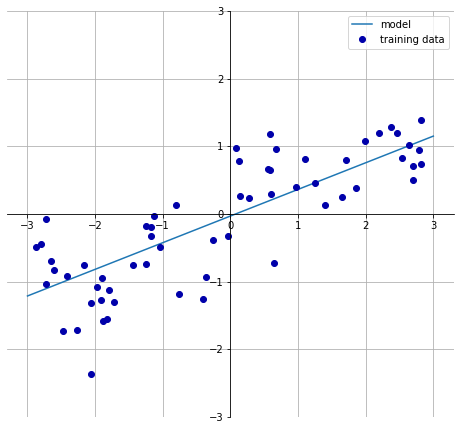

In [166]:
import mglearn
mglearn.plots.plot_linear_regression_wave()